# Sufficient levels computation variants
We have two variants how to compute the sufficient levels of energy needed to survive.

1. Least fixpoint from minInitCons $[(n\cdot c_{\mathrm{max}}) \cdot n$ iterations\]
2. Iterate minInitCons (largest fixpoint) on MDP where reloads with ∞ are removed. $[n^2\cdot n]$

The two variants are implemented currently as:
1. `safe_reloads_fixpoint(self)`
2. `sufficient_levels`

The option 2 computes minInitCons as a first step anyway (no reloads are removed at the beginning) as it results in a cleaner code. However, it does not sotre the values.

In [1]:
import safety
import ch_parser
man, targets = ch_parser.parse('NYCstreetnetwork.json')
man.structure_change()

## Variant 1
* on Manhattan example
* on test suite examples (tiny)

In [2]:
cap = 40
safety.debug_safe_reloads_function = lambda m: safety.minInitCons.safe_reloads_fixpoint(m)
%timeit man.get_safeReloads(cap, recompute=True)

356 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit 
%run test.safety.py

6.22 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Variant 2
* on Manhattan example
* on test suite examples (tiny)

In [4]:
safety.debug_safe_reloads_function = lambda m: safety.minInitCons.sufficient_levels(m)

man.structure_change()
%timeit man.get_safeReloads(cap, recompute=True)

1.88 s ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit 
%run test.safety.py

1.93 ms ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## What makes difference in the test suite
An example from the test suit that makes the difference is the one we used to show incorrectness of the least-fixpoint with at most $|S|$ iterations.

In [6]:
m = consMDP.ConsMDP()
m.new_state(True)
m.new_states(2)
m.new_state(True)
m.add_action(0, {0:1}, "", 1)
m.add_action(1, {0:1}, "a", 1000)
m.add_action(1, {2:1}, "b", 1)
m.add_action(2, {1:1}, "b", 1)
m.add_action(3, {3:1}, "r", 1010)
m.add_action(1, {3:1}, "r", 1)
m.add_action(2, {3:1}, "r", 1)

7

4.75 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


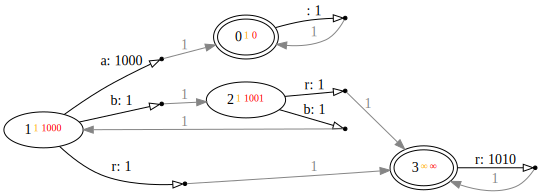

In [7]:
safety.debug_safe_reloads_function = lambda m: safety.minInitCons.safe_reloads_fixpoint(m)
%timeit m.get_safeReloads(1005, recompute=True)
m

83.9 µs ± 6.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


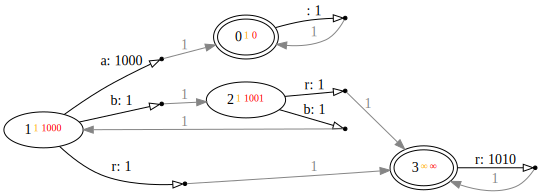

In [8]:
safety.debug_safe_reloads_function = lambda m: safety.minInitCons.sufficient_levels(m)
%timeit m.get_safeReloads(1005, recompute=True)
m